In [4]:
library(ggplot2)
library(dplyr)
library(imputeTS)
library(data.table)
library(forecast)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, first, last



In [1]:
df_us = read.csv(file="prices_opt_gaz.csv", header=TRUE, sep=",")

In [5]:
df_us = as.data.table(df_us)

In [18]:
rownames(df_us) = year(as.Date(as.character(df_us$X), format = "%Y", origin = "2012-01-01"))
#rownames(data)
df_us$X <- NULL
#colnames(data)

In [19]:
df_us

,Республика.Башкортостан,Республика.Калмыкия,Республика.Карелия,Республика.Коми,Республика.Марий.Эл,Республика.Мордовия,Республика.Татарстан,Удмуртская.Республика,Чувашская.Республика,Алтайский.край,⋯,Республика.Адыгея,Республика.Дагестан,Республика.Ингушетия,Кабардино.Балкарская.Республика,Карачаево.Черкесская.Республика,Республика.Северная.Осетия.Алания,Чеченская.Республика,Краснодарский.край,Ставропольский.край,Ростовская.область
2012,3073,3152,3437,2786,3175,3246,3122,2986,3175,3279,⋯,3609,3609,3609,3609,3609,3609,3609,3609,3609,3604
2013,3428,3514,3840,3098,3541,3624,3478,3329,3541,3644,⋯,4025,4025,4025,4025,4025,4025,4025,4025,4025,4022
2014,3534,3623,3959,3194,3651,3736,3586,3432,3651,3757,⋯,4149,4149,4149,4149,4149,4149,4149,4149,4149,4146
2015,3799,3895,4256,3433,3925,4016,3855,3689,3925,4039,⋯,4460,4460,4460,4460,4460,4460,4460,4460,4460,4457
2016,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2017,3947,4047,4422,3567,4078,4173,4005,3833,4078,4196,⋯,4634,4634,4634,4634,4634,4634,4634,4634,4634,4631
2018,4081,4185,4572,3688,4217,4315,4141,3963,4217,4339,⋯,4792,4792,4792,4792,4792,4792,4792,4792,4792,4788
2019,4138,4244,4636,3740,4276,4375,4199,4018,4276,4400,⋯,4859,4859,4859,4859,4859,4859,4859,4859,4859,4855


In [34]:
na.ma(df_us[,4], weighting = "exponential", k = 2)

Республика.Коми
2786.000
3098.000
3194.000
3433.000
3480.333
3567.000
3688.000
3740.000


In [36]:
df_us = na.ma(df_us, weighting = "exponential", k = 2)


In [37]:
write.csv(df_us, 'prices_opt_gaz_filled.csv')

In [20]:
# df_us$Р еспублика.Башкортостан  <-

na.ma(df_us$Республика.Башкортостан, weighting = "exponential", k = 4)

[1] 3073.000 3428.000 3534.000 3799.000 3814.931 3947.000 4081.000 4138.000

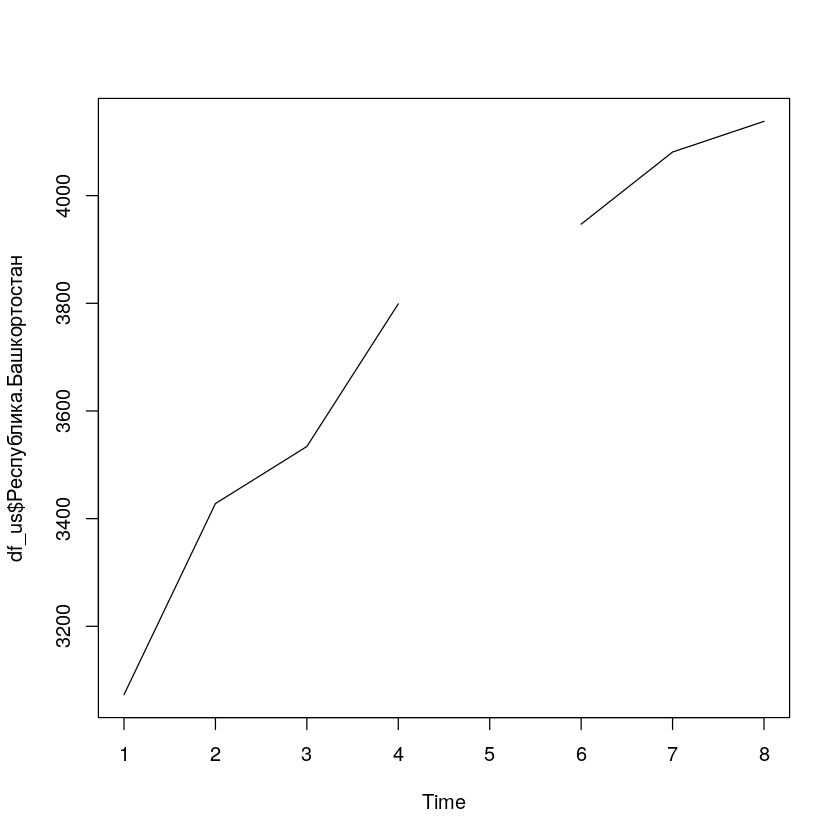

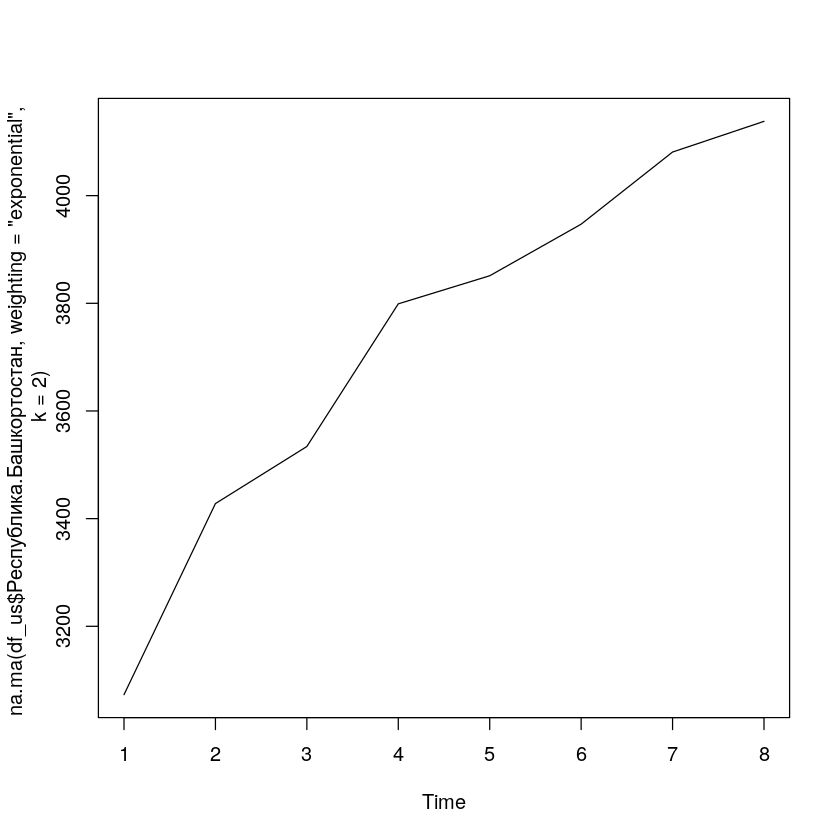

In [23]:
ts.plot(df_us$Республика.Башкортостан)

ts.plot(na.ma(df_us$Республика.Башкортостан, weighting = "exponential", k = 2))